<center><h1 style="font-size:80px; color:#A78B02;">﷽</h1></center>
<center><h1 style="font-size:45px; color:green;">" BOOK RECOMMENDATION SYSTEM"</h1></center>
<center><h3 style="font-size:20px; color:MidnightBlue;">"SEMESTER PROJECT OF" </h3> </center>
<center><h1 style="font-size:50px; color:MidnightBlue;">" MACHINE LEARNING "</h1></center>
<center><h3 style="font-size:30px; color:MidnightBlue;">"GROUP MEMBERRS"</h3></center>

<table style=" color:Green;font-size:30px; border:7px double MidnightBlue;border-collapse:collapse;border-spacing: 50px;">
   <tr style="background-color:#f2f0fc;">
    <th style="text-align: center; color: MidnightBlue;" >"Sr. No."</th>
    <th style="text-align: center; color: MidnightBlue" >"STUDENT NAME"</th>
    <th style="text-align: center; color: MidnightBlue" >"ROLL NUMBER"</th>
    </tr>
  <tr style="background-color:#fff;">
    <td style="text-align: center;" ><b>1.</b></td>
    <td style="text-align: center;" ><b>Muhammad Abdullah Shahid</b></td>
    <td style="text-align: center;" ><b>F2019027004</b></td>
  </tr>

  <tr style="background-color:#fff;">
    <td style="text-align: center;" ><b>2.</b></td>
    <td style="text-align: center;" ><b>Muhammad Muzamil</b></td>
    <td style="text-align: center;" ><b>F2019027042</b></td>
  </tr>
    
   <tr style="background-color:#fff;">
    <td style="text-align: center;" ><b>3.</b></td>
    <td style="text-align: center;" ><b>Amina Ashfaq</b></td>
    <td style="text-align: center;" ><b>F2019027010</b></td>
  </tr>
    
   <tr style="background-color:#fff;">
    <td style="text-align: center;" ><b>4.</b></td>
    <td style="text-align: center;" ><b>Zirwa Waqar</b></td>
    <td style="text-align: center;" ><b>F2019027020</b></td>
  </tr>
    
   <tr style="background-color:#fff;">
    <td style="text-align: center;" ><b>5.</b></td>
    <td style="text-align: center;" ><b>Sidra Kalsoom</b></td>
    <td style="text-align: center;" ><b>F2019027037</b></td>
  </tr>
</table>

<center><h3 style="font-size:30px; color:MidnightBlue;">"Importing Libraries"</h3></center>

In [1]:
import re
import os
import glob
import string
import pickle
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics.pairwise as smp
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords

<center><h3 style="font-size:30px; color:MidnightBlue;">"Read Data"</h3></center>

In [2]:
books_df = pd.concat(map(pd.read_csv, glob.glob('books/*.csv')))
books_df = books_df[['Id', 'Name', 'Publisher','PublishYear', 'Authors', 'Rating', 'CountsOfReview', 'Language', 'Description']]
books_df.head()

,Id,Name,Publisher,PublishYear,Authors,Rating,CountsOfReview,Language,Description
0,1,Harry Potter and the Half-Blood Prince (Harry ...,Scholastic Inc.,2006,J.K. Rowling,4.57,28062,eng,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,Scholastic Inc.,2004,J.K. Rowling,4.50,29770,eng,NaN
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,Scholastic Inc,2003,J.K. Rowling,4.47,75911,eng,NaN
3,4,Harry Potter and the Chamber of Secrets (Harry...,Scholastic,2003,J.K. Rowling,4.42,244,eng,NaN
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,Scholastic Inc.,2004,J.K. Rowling,4.57,37093,eng,NaN


<center><h3 style="font-size:30px; color:MidnightBlue;">"Describe Data"</h3></center>

In [3]:
books_df.shape

(538282, 9)

In [4]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538282 entries, 0 to 40889
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              538282 non-null  int64  
 1   Name            538282 non-null  object 
 2   Publisher       533218 non-null  object 
 3   PublishYear     538282 non-null  int64  
 4   Authors         538282 non-null  object 
 5   Rating          538282 non-null  float64
 6   CountsOfReview  538282 non-null  int64  
 7   Language        112236 non-null  object 
 8   Description     172583 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 41.1+ MB


In [5]:
books_df.isnull().sum()

Id                     0
Name                   0
Publisher           5064
PublishYear            0
Authors                0
Rating                 0
CountsOfReview         0
Language          426046
Description       365699
dtype: int64

<center><h1 style="font-size:40px; color:green;">1. Description Base Recommendation</h1></center>

In [6]:
pd.options.display.max_colwidth = 150
books_df.Description

0                                                                                                                                                          NaN
1                                                                                                                                                          NaN
2                                                                                                                                                          NaN
3                                                                                                                                                          NaN
4                                                                                                                                                          NaN
                                                                                 ...                                                                          
40885    <i>Gendered Talk at Work</i> examines

<center><h3 style="font-size:30px; color:MidnightBlue;">"Data Cleaning"</h3></center>

In [7]:
print(books_df.shape)
books_df = books_df.drop_duplicates(["Name"],  keep="first")
books_df = books_df.drop_duplicates(["Id"],  keep="first")
print(books_df.shape)

(538282, 9)
(500130, 9)


In [8]:
books_df = books_df.dropna().reset_index(drop=True)
books_df.shape

(24933, 9)

<center><h3 style="font-size:30px; color:MidnightBlue;">"Function For Data Cleaning"</h3></center>

In [9]:
def clean_text(text):  
    # Remove stopWords
    text = remove_stopwords(text)    
    # Remove URLs
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'https?://.*?\\s+', '', text, flags=re.MULTILINE)
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text=pattern.sub('', text)
    # Remove long words
    longword = re.compile(r'\W*\b\w{15,500}\b')
    text=longword.sub('', text)
    # Remove short words
    shortword = re.compile(r'\W*\b\w{1,3}\b')
    text=shortword.sub('', text)
    # remove emojis from text
    text = text.encode('ascii', 'ignore').decode('ascii')

    # lower capitalization
    text=text.lower()
    
    # Remove punctuation 
    remove = string.punctuation
    remove = remove.replace("@", "")
    pattern = r"[{}]".format(remove) # create the pattern
    text=re.sub(pattern, "", text) 
    
    # Remove digits
    text = ''.join([i for i in text if not i.isdigit()])

    return text


In [11]:


for x in range(len(books_df['Description'])):
    books_df['Description'][x] = clean_text(books_df['Description'][x])

<ipython-input-11-07480ecfe8c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_df['Description'][x] = clean_text(books_df['Description'][x])


In [12]:
books_df['Description']

0        lessons learned coordinating publicity tour italy famous adorablechef kind assignment juliet relished carlo franconi gather crowd smiling watching...
1         collection horror stories variety english american authors contents teigkane corpse traditional fortunes martin waldeck walter scott soul cages t...
2        originally published  bestvolume aerial history world richard overy classic work remains profound highly origi account battles professor overy tre...
3        here time volume story crimes committed nazi leaders trials brought judgement conot reconstructs single absorbing narrative events nuremburg offen...
4         visionary look future freeman dyson argues technological changes fundamentally alter ethical social arrangements rapidly advancing technologiesso...
                                                                                 ...                                                                          
24928                                         

In [10]:
books_df['Description'] = books_df['Description'].map( lambda x: clean_text(x))

In [11]:
books_df['Name'] = books_df['Name'].str.replace('#','No')

<center><h3 style="font-size:30px; color:MidnightBlue;">"Store Cleaned Dataset in CSV File"</h3></center>

In [12]:
books_df.to_csv ('books_cleaned_df.csv', index = False, header=True)
df = books_df.copy()

In [13]:
df.Description

0        lessons learned coordinating publicity tour italy famous adorablechef kind assignment juliet relished carlo franconi gather crowd smiling watching...
1         collection horror stories variety english american authors contents teigkane corpse traditional fortunes martin waldeck walter scott soul cages t...
2        originally published  bestvolume aerial history world richard overy classic work remains profound highly origi account battles professor overy tre...
3        here time volume story crimes committed nazi leaders trials brought judgement conot reconstructs single absorbing narrative events nuremburg offen...
4         visionary look future freeman dyson argues technological changes fundamentally alter ethical social arrangements rapidly advancing technologiesso...
                                                                                 ...                                                                          
24928                                         

<center><h3 style="font-size:30px; color:MidnightBlue;">"Data Visulaization"</h3></center>

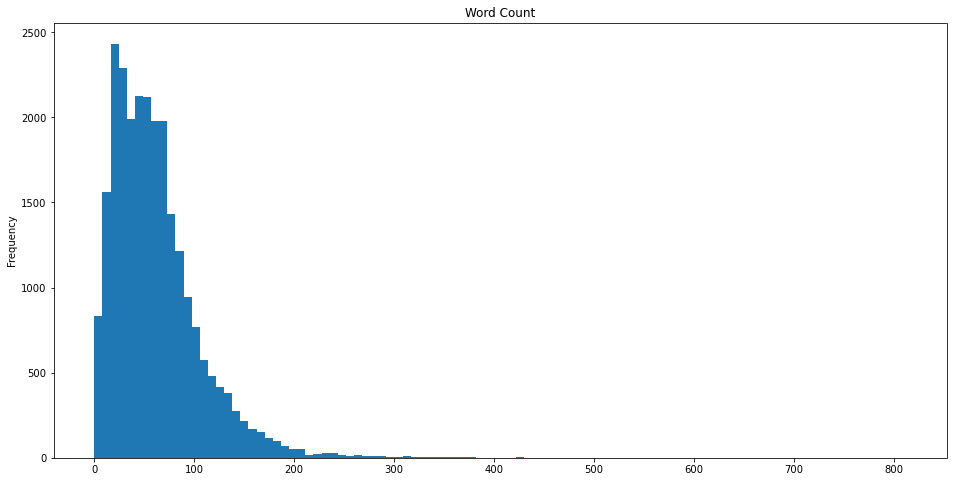

In [14]:
# word count
plot_df= df['Description'].apply(lambda x: len(str(x).split()))
plot_df.plot( kind='hist', bins = 100, figsize = (16,8),title='Word Count');

<center><h3 style="font-size:30px; color:MidnightBlue;">"Convert Into Feature Vector Using TfidfVectorizer"</h3></center>

## <font color="green"> 1. Unigram Feature Vector </font>

In [36]:
tfidf_unigram = TfidfVectorizer(lowercase = False,
                                stop_words = 'english',
                                strip_accents='unicode', 
                                analyzer='word',
                                token_pattern=r'\w{1,}',
                                ngram_range=(1, 1),
                                max_features = 5000
                               )

print("Parameters of TfidfVectorizer and its values:\n\t\t",tfidf_unigram)
description_unigram_vector = tfidf_unigram.fit_transform(df['Description'])
features = pd.DataFrame(description_unigram_vector.toarray(), columns = tfidf_unigram.get_feature_names())
features


Parameters of TfidfVectorizer and its values:
		 TfidfVectorizer(lowercase=False, max_features=5000, stop_words='english',
                strip_accents='unicode', token_pattern='\\w{1,}')


,abandon,abandoned,aber,abilities,ability,able,aboard,abraham,abroad,absolute,...,year,years,yellow,yoga,york,young,younger,youngest,youth,zeit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
features['abandon'].sum()

10.48744950453684

In [38]:
description_unigram_vector.sum(axis=0)

matrix([[10.4874495 , 25.31588719, 21.69079192, ..., 14.85396922,
         26.67170992, 11.97013258]])

In [39]:
tfidf_unigram.vocabulary_.items()

dict_items([('lessons', 2616), ('learned', 2598), ('tour', 4573), ('italy', 2419), ('famous', 1671), ('kind', 2528), ('assignment', 280), ('gather', 1881), ('watching', 4868), ('prepare', 3426), ('meal', 2830), ('like', 2641), ('lesson', 2615), ('passionate', 3234), ('time', 4542), ('planned', 3329), ('world', 4967), ('chef', 663), ('women', 4948), ('preparing', 3429), ('intimate', 2370), ('hadn', 2019), ('dinner', 1234), ('plans', 3331), ('romance', 3838), ('setting', 4014), ('romantic', 3840), ('recipes', 3648), ('heart', 2087), ('collection', 762), ('horror', 2173), ('stories', 4275), ('variety', 4768), ('english', 1484), ('american', 157), ('authors', 321), ('contents', 908), ('corpse', 952), ('traditional', 4591), ('martin', 2798), ('walter', 4847), ('scott', 3930), ('soul', 4163), ('thomas', 4513), ('musical', 2981), ('christopher', 691), ('demon', 1145), ('lady', 2553), ('wilde', 4911), ('coach', 749), ('edwards', 1394), ('vampire', 4763), ('guest', 2002), ('grant', 1963), ('all

In [42]:
total_words = description_unigram_vector.sum(axis=0) 
frequency = [(word, total_words[0, idx]) for word, idx in tfidf_unigram.vocabulary_.items()]
frequency

[('lessons', 31.638220194095936),
 ('learned', 34.81794581488613),
 ('tour', 41.147321665821984),
 ('italy', 27.15720914120278),
 ('famous', 78.94923165973212),
 ('kind', 53.92283442588233),
 ('assignment', 12.81005264738589),
 ('gather', 10.655861885812007),
 ('watching', 17.079002391396187),
 ('prepare', 21.982540106042563),
 ('meal', 7.657055594290189),
 ('like', 198.24652129273716),
 ('lesson', 19.7731810577014),
 ('passionate', 39.06001338381278),
 ('time', 293.72123680533446),
 ('planned', 12.638836030091417),
 ('world', 398.9129690088435),
 ('chef', 14.17023976766971),
 ('women', 172.73509973267574),
 ('preparing', 16.60574186463993),
 ('intimate', 28.285452458854696),
 ('hadn', 12.881862472243853),
 ('dinner', 20.07220595414238),
 ('plans', 44.05460625929505),
 ('romance', 60.2735960492956),
 ('setting', 34.11422208707756),
 ('romantic', 39.65318941081672),
 ('recipes', 45.80025374668177),
 ('heart', 139.80310816357397),
 ('collection', 155.86146036994816),
 ('horror', 40.61908

In [43]:
frequency =sorted(frequency, key = lambda x: x[1], reverse=True)
frequency

[('book', 487.5707059468696),
 ('life', 416.35554347321704),
 ('world', 398.9129690088435),
 ('time', 293.72123680533446),
 ('story', 290.5549297323808),
 ('history', 271.21258176142504),
 ('love', 265.3076083641296),
 ('years', 250.19549304883478),
 ('work', 243.94883487403393),
 ('family', 228.97697087453454),
 ('young', 221.912852646177),
 ('people', 214.97831681584336),
 ('stories', 209.90859094722154),
 ('series', 202.27419752341473),
 ('edition', 198.86551083315766),
 ('like', 198.24652129273716),
 ('author', 196.34977758037297),
 ('american', 191.08574404031287),
 ('great', 184.35620017030035),
 ('children', 183.4248503435738),
 ('woman', 179.78905208694198),
 ('help', 179.6392281387352),
 ('readers', 177.32353643099225),
 ('women', 172.73509973267574),
 ('best', 170.57111606853616),
 ('home', 169.1633306500992),
 ('volume', 164.5271535864919),
 ('death', 162.66424919953064),
 ('little', 162.08775188604156),
 ('novel', 157.54208360231775),
 ('collection', 155.86146036994816),
 (

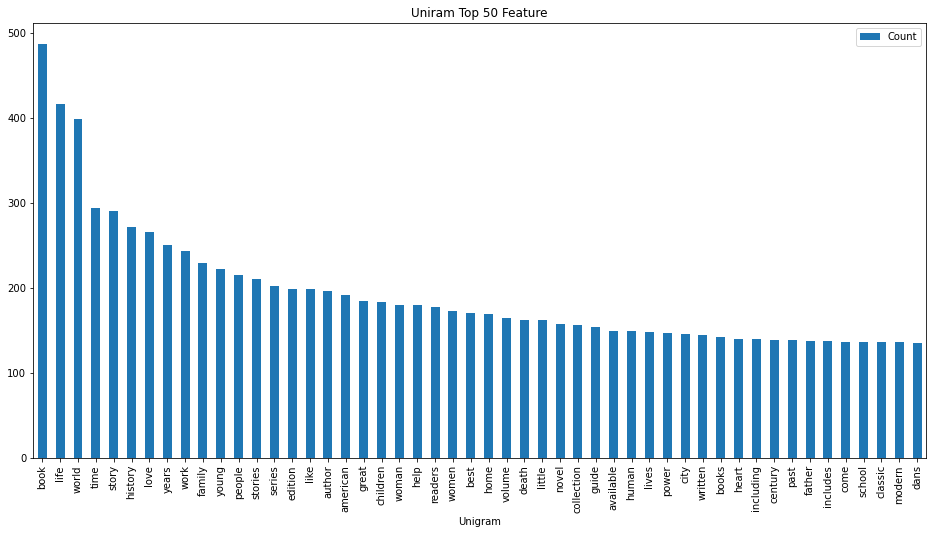

In [33]:
total_words = description_unigram_vector.sum(axis=0) 
frequency = [(word, total_words[0, idx]) for word, idx in tfidf_unigram.vocabulary_.items()]
frequency =sorted(frequency, key = lambda x: x[1], reverse=True)
plot_df = pd.DataFrame(frequency)
plot_df.rename(columns = {0:'Unigram', 1: 'Count'}, inplace = True) 
plot_df = plot_df.head(50)
plot_df.plot(x ='Unigram', y='Count', kind = 'bar', title = "Uniram Top 50 Feature", figsize = (16,8), ); 

del tfidf_unigram
del features
del total_words
del frequency
del plot_df

## <font color="green"> 2. Bigram Feature Vector </font>

In [17]:
tfidf_bigram = TfidfVectorizer(lowercase = False,
                                stop_words = 'english',
                                strip_accents='unicode', 
                                analyzer='word',
                                token_pattern=r'\w{1,}',
                                ngram_range=(1, 2),
                                max_features = 5000
                               )

print("Parameters of TfidfVectorizer and its values:\n\t\t",tfidf_bigram)
description_bigram_vector = tfidf_bigram.fit_transform(df['Description'])
features = pd.DataFrame(description_bigram_vector.toarray(), columns = tfidf_bigram.get_feature_names())
features


Parameters of TfidfVectorizer and its values:
		 TfidfVectorizer(lowercase=False, max_features=5000, ngram_range=(1, 2),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\w{1,}')


,abandon,abandoned,aber,abilities,ability,able,aboard,abraham,abroad,absolute,...,young children,young girl,young people,young readers,young woman,young women,younger,youngest,youth,zeit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


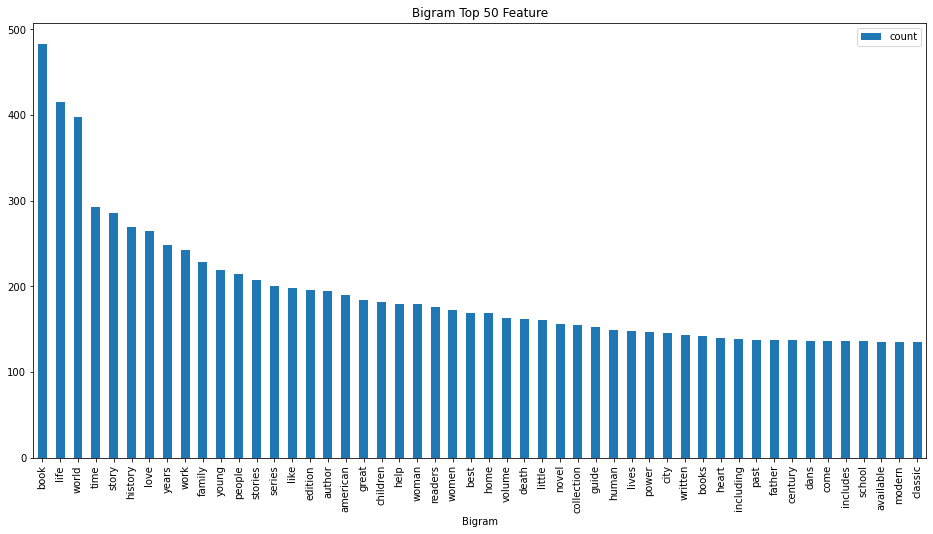

In [18]:
total_words = description_bigram_vector.sum(axis=0)
frequency = [(word, total_words[0, idx]) for word, idx in tfidf_bigram.vocabulary_.items()]
frequency =sorted(frequency, key = lambda x: x[1], reverse=True)
plot_df = pd.DataFrame(frequency)
plot_df.rename(columns = {0:'Bigram', 1: 'count'}, inplace = True) 
plot_df = plot_df.head(50)
plot_df.plot(x ='Bigram', y='count', kind = 'bar', title = "Bigram Top 50 Feature", figsize = (16,8), ); 

del tfidf_bigram
del features
del total_words
del frequency
del plot_df

## <font color="green"> 3. Trigram Feature Vector </font>

In [19]:
tfidf_trigram = TfidfVectorizer(lowercase = False,
                                stop_words = 'english',
                                strip_accents='unicode', 
                                analyzer='word',
                                token_pattern=r'\w{1,}',
                                ngram_range=(1, 2),
                                max_features = 5000
                               )

print("Parameters of TfidfVectorizer and its values:\n\t\t",tfidf_trigram)
description_trigram_vector = tfidf_trigram.fit_transform(df['Description'])
features = pd.DataFrame(description_trigram_vector.toarray(), columns = tfidf_trigram.get_feature_names())
features


Parameters of TfidfVectorizer and its values:
		 TfidfVectorizer(lowercase=False, max_features=5000, ngram_range=(1, 2),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\w{1,}')


,abandon,abandoned,aber,abilities,ability,able,aboard,abraham,abroad,absolute,...,young children,young girl,young people,young readers,young woman,young women,younger,youngest,youth,zeit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


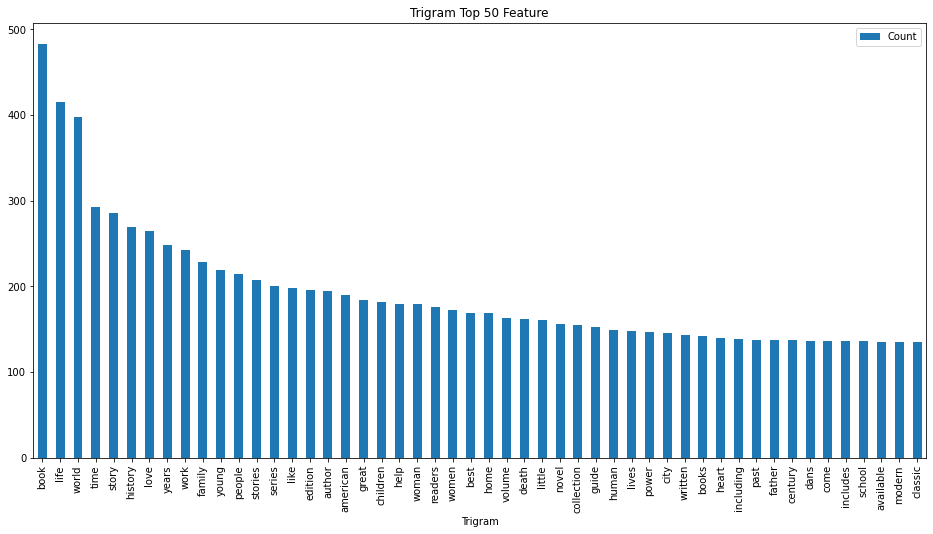

In [20]:
total_words = description_trigram_vector.sum(axis=0) 
frequency = [(word, total_words[0, idx]) for word, idx in tfidf_trigram.vocabulary_.items()]
frequency =sorted(frequency, key = lambda x: x[1], reverse=True)#converting into dataframe 
plot_df = pd.DataFrame(frequency)
plot_df.rename(columns = {0:'Trigram', 1: 'Count'}, inplace = True) 
plot_df = plot_df.head(50)
plot_df.plot(x ='Trigram', y='Count', kind = 'bar', title = "Trigram Top 50 Feature", figsize = (16,8), ); 

del tfidf_trigram
del features
del total_words
del frequency
del plot_df

<center><h3 style="font-size:30px; color:MidnightBlue;">"Function for Prediction"</h3></center>

In [21]:
indices = pd.Series(df.index, index=df['Name']).drop_duplicates()
indices

Name
Lessons Learned (Great Chefs, No2)                                                    0
Spine-Chillers: Unforgettable Tales of Terror                                         1
The Air War: 1939-45                                                                  2
Justice at Nuremberg                                                                  3
The Sun, the Genome and the Internet: Tools of Scientific Revolutions                 4
                                                                                  ...  
El Dia de Elmer / Elmer's Day (Spanish- English)                                  24928
Elmer's Weather (English–Spanish)                                                 24929
Los Amigos de Elmer / Elmer's Friends (Spanish- English)                          24930
Journey Of The Adopted Self: A Quest For Wholeness                                24931
Gender Talk: The Struggle For Women's Equality in African American Communities    24932
Length: 24933, dtype: int64

In [22]:
def description_base_recommendations(name, model):
    indexNo = indices[name]
    listOfIndexNo = model[indexNo]
    listOfIndexNo = list(enumerate(listOfIndexNo))    
    listOfIndexNo = sorted(listOfIndexNo, key=lambda x: x[1], reverse=True)
    listOfIndexNo = listOfIndexNo[1:12]   
    listOfIndexNo = [i[0] for i in listOfIndexNo]
    return books_df['Name'].iloc[listOfIndexNo]

<center><h3 style="font-size:30px; color:MidnightBlue;">"Train & Test on Unigram"</h3></center>

## <font color="green"> Use sigmoid_kernel on Unigram </font>

In [23]:
sigk_description_unigram = smp.sigmoid_kernel(description_unigram_vector, description_unigram_vector)
print(sigk_description_unigram[0])

[0.76167814 0.76159416 0.76159518 ... 0.76159416 0.76159474 0.76159872]


In [24]:
description_base_recommendations('Breakfasts & Brunches', sigk_description_unigram)

18116                                        Cooking in a Can: More Campfire Recipes for Kids
3900     The Magic of Fire: Hearth Cooking: One Hundred Recipes for the Fireplace or Campfire
7164                                                             Market Microstructure Theory
10250                                      Cooking From the Hip: Fast, Easy, Phenomenal Meals
360                                     How to Cook Everything: Simple Recipes for Great Food
16181                                                                    Settlement Cook Book
6413                                              What's Cooking? (Rose Cottage Sisters, No2)
23472                      Santa Fe School of Cooking Cookbook: Spirited Southwestern Recipes
10956                                                     The Complete Cooking Light Cookbook
13799                                                                  Gigolos Get Lonely Too
19110                   Eula Mae's Cajun Kitchen: Cooking Th

## <font color="green"> Use linear_kernel on Unigram </font>

In [25]:
lk_description_unigram = linear_kernel(description_unigram_vector, description_unigram_vector)
print(lk_description_unigram[0])

[1.         0.         0.01223509 ... 0.         0.00696093 0.05434922]


In [26]:
description_base_recommendations('Breakfasts & Brunches', lk_description_unigram)

18116                                        Cooking in a Can: More Campfire Recipes for Kids
3900     The Magic of Fire: Hearth Cooking: One Hundred Recipes for the Fireplace or Campfire
7164                                                             Market Microstructure Theory
10250                                      Cooking From the Hip: Fast, Easy, Phenomenal Meals
360                                     How to Cook Everything: Simple Recipes for Great Food
16181                                                                    Settlement Cook Book
6413                                              What's Cooking? (Rose Cottage Sisters, No2)
23472                      Santa Fe School of Cooking Cookbook: Spirited Southwestern Recipes
10956                                                     The Complete Cooking Light Cookbook
13799                                                                  Gigolos Get Lonely Too
19110                   Eula Mae's Cajun Kitchen: Cooking Th

<center><h3 style="font-size:30px; color:MidnightBlue;">"Train & Test on Bigram"</h3></center>

## <font color="green"> Use sigmoid_kernel on Bigram </font>

In [27]:
del sigk_description_unigram
del lk_description_unigram

sigk_description_bigram = smp.sigmoid_kernel(description_bigram_vector, description_bigram_vector)
print(sigk_description_bigram[0])

[0.76167814 0.76159416 0.76159516 ... 0.76159416 0.76159474 0.76159852]


In [28]:
description_base_recommendations('Breakfasts & Brunches', sigk_description_bigram)

18116                                        Cooking in a Can: More Campfire Recipes for Kids
3900     The Magic of Fire: Hearth Cooking: One Hundred Recipes for the Fireplace or Campfire
10250                                      Cooking From the Hip: Fast, Easy, Phenomenal Meals
360                                     How to Cook Everything: Simple Recipes for Great Food
7164                                                             Market Microstructure Theory
16181                                                                    Settlement Cook Book
23472                      Santa Fe School of Cooking Cookbook: Spirited Southwestern Recipes
10956                                                     The Complete Cooking Light Cookbook
13799                                                                  Gigolos Get Lonely Too
19110                   Eula Mae's Cajun Kitchen: Cooking Through the Seasons on Avery Island
8670                                                        

## <font color="green"> Use linear_kernel on Bigram </font>

In [29]:
lk_description_bigram = linear_kernel(description_bigram_vector, description_bigram_vector)
print(lk_description_bigram[0])

[1.         0.         0.01193382 ... 0.         0.00696093 0.05201006]


In [30]:
description_base_recommendations('Breakfasts & Brunches', lk_description_bigram)

18116                                        Cooking in a Can: More Campfire Recipes for Kids
3900     The Magic of Fire: Hearth Cooking: One Hundred Recipes for the Fireplace or Campfire
10250                                      Cooking From the Hip: Fast, Easy, Phenomenal Meals
360                                     How to Cook Everything: Simple Recipes for Great Food
7164                                                             Market Microstructure Theory
16181                                                                    Settlement Cook Book
23472                      Santa Fe School of Cooking Cookbook: Spirited Southwestern Recipes
10956                                                     The Complete Cooking Light Cookbook
13799                                                                  Gigolos Get Lonely Too
19110                   Eula Mae's Cajun Kitchen: Cooking Through the Seasons on Avery Island
8670                                                        

<center><h3 style="font-size:30px; color:MidnightBlue;">"Train & Test on Trigram"</h3></center>

## <font color="green"> Use sigmoid_kernel on Trigram </font>

In [31]:
del sigk_description_bigram
del lk_description_bigram

sigk_description_trigram = smp.sigmoid_kernel(description_trigram_vector, description_trigram_vector)
print(sigk_description_trigram[0])

[0.76167814 0.76159416 0.76159516 ... 0.76159416 0.76159474 0.76159852]


In [32]:
description_base_recommendations('Breakfasts & Brunches', sigk_description_trigram)

18116                                        Cooking in a Can: More Campfire Recipes for Kids
3900     The Magic of Fire: Hearth Cooking: One Hundred Recipes for the Fireplace or Campfire
10250                                      Cooking From the Hip: Fast, Easy, Phenomenal Meals
360                                     How to Cook Everything: Simple Recipes for Great Food
7164                                                             Market Microstructure Theory
16181                                                                    Settlement Cook Book
23472                      Santa Fe School of Cooking Cookbook: Spirited Southwestern Recipes
10956                                                     The Complete Cooking Light Cookbook
13799                                                                  Gigolos Get Lonely Too
19110                   Eula Mae's Cajun Kitchen: Cooking Through the Seasons on Avery Island
8670                                                        

## <font color="green"> Use linear_kernel on Trigram </font>

In [33]:
lk_description_trigram = linear_kernel(description_bigram_vector, description_bigram_vector)
print(lk_description_trigram[0])

[1.         0.         0.01193382 ... 0.         0.00696093 0.05201006]


In [34]:
description_base_recommendations('Breakfasts & Brunches', lk_description_trigram)

18116                                        Cooking in a Can: More Campfire Recipes for Kids
3900     The Magic of Fire: Hearth Cooking: One Hundred Recipes for the Fireplace or Campfire
10250                                      Cooking From the Hip: Fast, Easy, Phenomenal Meals
360                                     How to Cook Everything: Simple Recipes for Great Food
7164                                                             Market Microstructure Theory
16181                                                                    Settlement Cook Book
23472                      Santa Fe School of Cooking Cookbook: Spirited Southwestern Recipes
10956                                                     The Complete Cooking Light Cookbook
13799                                                                  Gigolos Get Lonely Too
19110                   Eula Mae's Cajun Kitchen: Cooking Through the Seasons on Avery Island
8670                                                        

<center><h3 style="font-size:30px; color:MidnightBlue;">"Save Trained Model"</h3></center>

In [35]:
# convert numpy array to list
sigk_description_trigram = list(sigk_description_trigram)

# reduce the size
for indexNo in range(len(sigk_description_trigram)):
    listOfIndexNo = sigk_description_trigram[indexNo]
    listOfIndexNo = list(enumerate(listOfIndexNo))    
    listOfIndexNo = sorted(listOfIndexNo, key=lambda x: x[1], reverse=True)
    listOfIndexNo = listOfIndexNo[1:12]
    sigk_description_trigram[indexNo] = listOfIndexNo

# save model
with open('savedSigmoidKernelDescriptionTrigram.txt', 'wb') as model:
    pickle.dump(sigk_description_trigram, model)
    
del sigk_description_trigram
del lk_description_trigram

<center><h1 style="font-size:40px; color:green;">2. Rating and Review Base Recommendation</h1></center>

In [44]:
pd.options.display.max_colwidth = 150
books_df[['Name', 'Rating', 'CountsOfReview']]

,Name,Rating,CountsOfReview
0,"Lessons Learned (Great Chefs, No2)",3.74,86
1,Spine-Chillers: Unforgettable Tales of Terror,2.80,2
2,The Air War: 1939-45,3.86,7
3,Justice at Nuremberg,4.15,16
4,"The Sun, the Genome and the Internet: Tools of Scientific Revolutions",3.72,17
...,...,...,...
24928,El Dia de Elmer / Elmer's Day (Spanish- English),3.82,0
24929,Elmer's Weather (English–Spanish),3.74,1
24930,Los Amigos de Elmer / Elmer's Friends (Spanish- English),3.78,0
24931,Journey Of The Adopted Self: A Quest For Wholeness,4.15,10


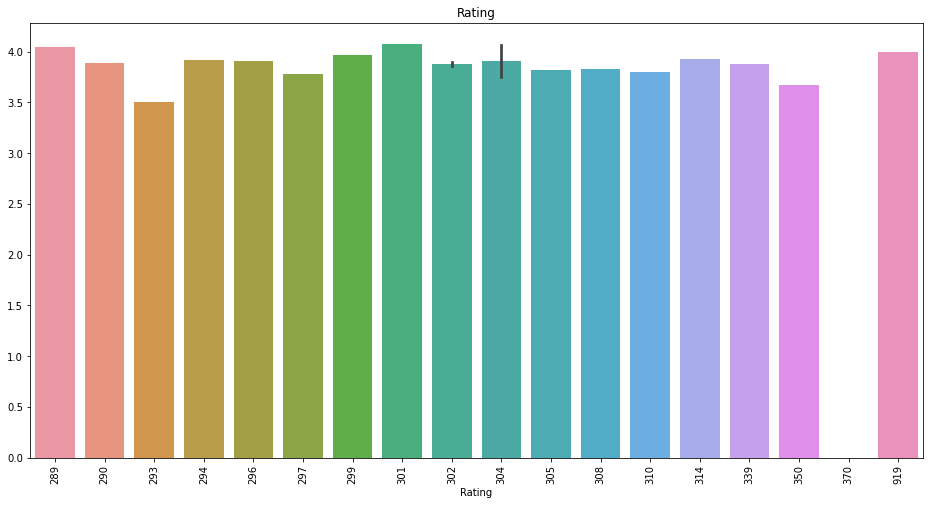

In [45]:
df = books_df.copy()

plot_df = df['Rating'].value_counts().head(20)
title="Rating"
fig = plt.figure(figsize=(16,8))
bar_plot = sns.barplot(x = plot_df, y=plot_df.index)
for item in bar_plot.get_xticklabels():
    item.set_rotation(90)
plt.title(title)
plt.show()

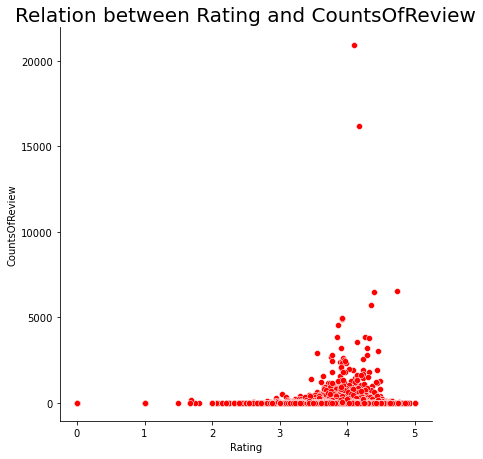

<Figure size 1152x576 with 0 Axes>

In [46]:
ax = sns.relplot(data=df, x="Rating", y="CountsOfReview", color = 'red', height=6, marker='o')
plt.title("Relation between Rating and CountsOfReview", fontsize = 20)
fig = plt.figure(figsize=(16,8))
ax.set_axis_labels("Rating", "CountsOfReview");

<center><h3 style="font-size:30px; color:MidnightBlue;">"Bining"</h3></center>

In [47]:
df.Rating

0        3.74
1        2.80
2        3.86
3        4.15
4        3.72
         ... 
24928    3.82
24929    3.74
24930    3.78
24931    4.15
24932    4.03
Name: Rating, Length: 24933, dtype: float64

In [48]:
df.loc[(df.Rating >= 0) & (df.Rating <= 1), 'RatingRange'] = "rating 0 to 1"
df.loc[(df.Rating > 1) & (df.Rating <= 2), 'RatingRange'] = "rating 1 to 2"
df.loc[(df.Rating > 2) & (df.Rating <= 3), 'RatingRange'] = "rating 2 to 3"
df.loc[(df.Rating > 3) & (df.Rating <= 4), 'RatingRange'] = "rating 3 to 4"
df.loc[(df.Rating > 4) & (df.Rating <= 5), 'RatingRange'] = "rating 4 to 5"

In [49]:
rating_dummies = pd.get_dummies(df['RatingRange'])
features_df = pd.concat([rating_dummies, df['Rating'], df['CountsOfReview']], axis=1)

In [50]:
rating_dummies

,rating 0 to 1,rating 1 to 2,rating 2 to 3,rating 3 to 4,rating 4 to 5
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,0,1,0
...,...,...,...,...,...
24928,0,0,0,1,0
24929,0,0,0,1,0
24930,0,0,0,1,0
24931,0,0,0,0,1


In [51]:
features_df

,rating 0 to 1,rating 1 to 2,rating 2 to 3,rating 3 to 4,rating 4 to 5,Rating,CountsOfReview
0,0,0,0,1,0,3.74,86
1,0,0,1,0,0,2.80,2
2,0,0,0,1,0,3.86,7
3,0,0,0,0,1,4.15,16
4,0,0,0,1,0,3.72,17
...,...,...,...,...,...,...,...
24928,0,0,0,1,0,3.82,0
24929,0,0,0,1,0,3.74,1
24930,0,0,0,1,0,3.78,0
24931,0,0,0,0,1,4.15,10


<center><h3 style="font-size:30px; color:MidnightBlue;">"Convert into Feature Vector using KNeighbors"</h3></center>

In [52]:
min_max_scaler = MinMaxScaler()
features_kn = min_max_scaler.fit_transform(features_df)
features_kn

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.48000000e-01, 4.11424197e-03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 5.60000000e-01, 9.56800459e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.72000000e-01, 3.34880161e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.56000000e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 8.30000000e-01, 4.78400230e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 8.06000000e-01, 9.56800459e-05]])

<center><h3 style="font-size:30px; color:MidnightBlue;">"Use NearestNeighbors"</h3></center>

In [43]:
nnb = neighbors.NearestNeighbors(n_neighbors=11)
nnb.fit(features_kn)
dist, similarBooksIdListByNN = nnb.kneighbors(features_kn)
similarBooksIdListByNN

array([[    0, 20724, 15803, ..., 20703,  1946,  4532],
       [    1, 22937, 12694, ..., 15451, 13349, 14706],
       [ 7678, 15951, 10714, ...,   370,     2,  5358],
       ...,
       [  265,  8026,  5040, ...,  1485,    67,  2612],
       [ 8690, 24931, 22746, ..., 13875,  7036,  2404],
       [24932, 13144,  9267, ...,  3843,   505,   999]], dtype=int64)

<center><h3 style="font-size:30px; color:MidnightBlue;">"Function for Recomandation"</h3></center>

In [44]:
def rating_and_review_base_recommendations(name, similarBooks):
    listOfBooks = []
    IndexNo = df[df['Name'] == name].index
    IndexNo = IndexNo[0]
    for newid in similarBooks[IndexNo]:
        if books_df.loc[newid].Name != name:
            listOfBooks.append(books_df.loc[newid].Name)
    return listOfBooks

In [45]:
rating_and_review_base_recommendations('Breakfasts & Brunches', similarBooksIdListByNN)

["Mémoires d'Agrippine",
 "Soif d'amour",
 'Life of Themistocles',
 'Singapore: 500 Early Postcards',
 'To Catch a King',
 'A Gathering of Stones',
 'The Camp-Out Mystery',
 "Woman Of Innocence (Morgan's Mercenaries: Women of Destiny No1, Morgan's Mercenaries No19)",
 'Neutron Force (Stony Man, No89)',
 'The Philosophy of Sex: Contemporary  Readings']

<center><h3 style="font-size:30px; color:MidnightBlue;">"Save Trained Model"</h3></center>

In [46]:
with open('savedSimilarBooksIdListByNN.txt', 'wb') as model:
    pickle.dump(similarBooksIdListByNN, model)
    
del min_max_scaler
del features_kn
del nnb
del dist
del similarBooksIdListByNN
del plot_df

<center><h1 style="font-size:35px; color:green;">3. Authors And Publisher Base Recommendation</h1></center>

In [47]:
pd.options.display.max_colwidth = 150
books_df[['Name', 'Authors', 'Publisher']]

,Name,Authors,Publisher
0,"Lessons Learned (Great Chefs, No2)",Nora Roberts,Silhouette
1,Spine-Chillers: Unforgettable Tales of Terror,Roger Elwood,Doubleday Books
2,The Air War: 1939-45,Richard Overy,Potomac Books
3,Justice at Nuremberg,Robert E. Conot,Basic Books
4,"The Sun, the Genome and the Internet: Tools of Scientific Revolutions",Freeman Dyson,"Oxford University Press, USA"
...,...,...,...
24928,El Dia de Elmer / Elmer's Day (Spanish- English),David McKee,Milet Publishing
24929,Elmer's Weather (English–Spanish),David McKee,Milet Publishing
24930,Los Amigos de Elmer / Elmer's Friends (Spanish- English),David McKee,Milet Publishing
24931,Journey Of The Adopted Self: A Quest For Wholeness,Betty Jean Lifton,Basic Books


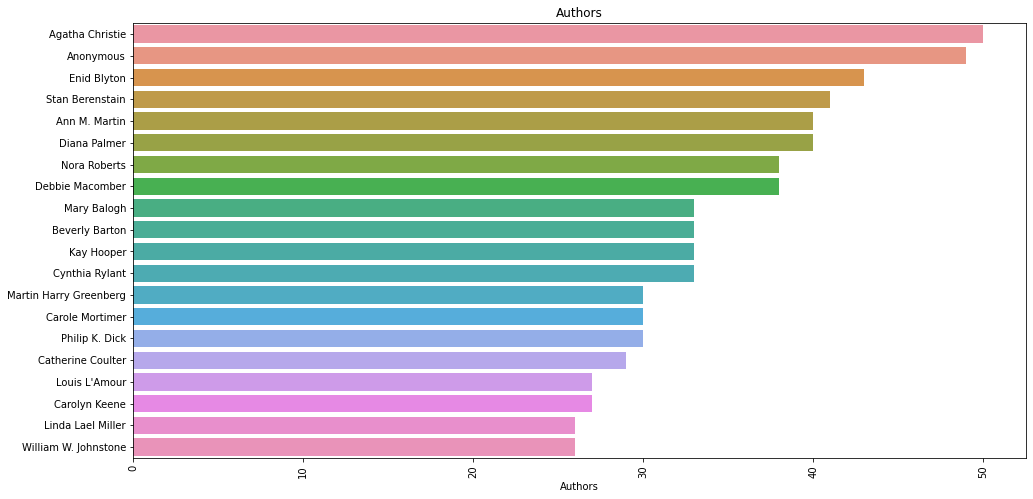

In [48]:
df = books_df.copy()

plot_df = df['Authors'].value_counts().head(20)
title="Authors"
fig = plt.figure(figsize=(16,8))
bar_plot = sns.barplot(x = plot_df, y=plot_df.index)
for item in bar_plot.get_xticklabels():
    item.set_rotation(90)
plt.title(title)
plt.show()

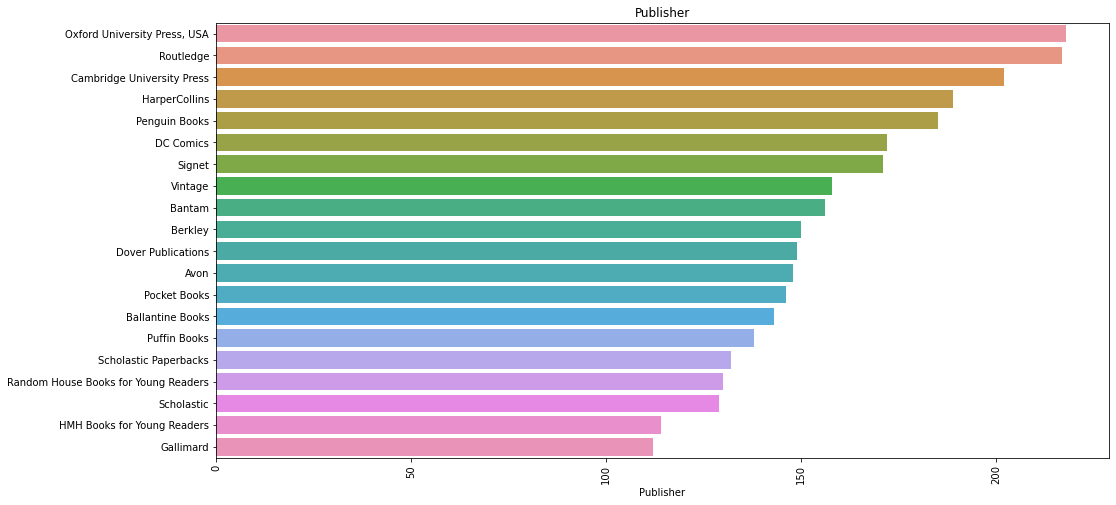

In [49]:
plot_df = df['Publisher'].value_counts().head(20)
title="Publisher"
fig = plt.figure(figsize=(16,8))
bar_plot = sns.barplot(x = plot_df, y = plot_df.index)
for item in bar_plot.get_xticklabels():
    item.set_rotation(90)
plt.title(title)
plt.show()

In [50]:
df['Authors-Publisher'] = df['Authors'] + df['Publisher']

<center><h3 style="font-size:30px; color:MidnightBlue;">"Data Cleaning"</h3></center>

In [51]:
df['Authors-Publisher'] = df['Authors-Publisher'].map( lambda x: clean_text(x))

<center><h3 style="font-size:30px; color:MidnightBlue;">"Convert Into Feature Vector Using TfidfVectorizer"</h3></center>

In [52]:
tfidf_char_n3gram = TfidfVectorizer(lowercase = False,
                                    stop_words = 'english',
                                    strip_accents='unicode', 
                                    analyzer='char',
                                    token_pattern=r'\c{1,}',
                                    ngram_range=(1, 3),
                                    max_features = 10000
                                   )

print("Parameters of TfidfVectorizer and its values:\n\t\t", tfidf_char_n3gram)
ap_char_n3gram_vector = tfidf_char_n3gram.fit_transform(df['Authors-Publisher'])
features = pd.DataFrame(ap_char_n3gram_vector.toarray(), columns = tfidf_char_n3gram.get_feature_names())
features


Parameters of TfidfVectorizer and its values:
		 TfidfVectorizer(analyzer='char', lowercase=False, max_features=10000,
                ngram_range=(1, 3), stop_words='english',
                strip_accents='unicode', token_pattern='\\c{1,}')


,,a,aa,ab,ac,ad,ae,af,ag,ah,...,zyn,zz,zz,zza,zze,zzi,zzl,zzo,zzu,zzy
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.062820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.062806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.069489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.085882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24928,0.069383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24929,0.069383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24930,0.069383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24931,0.091135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


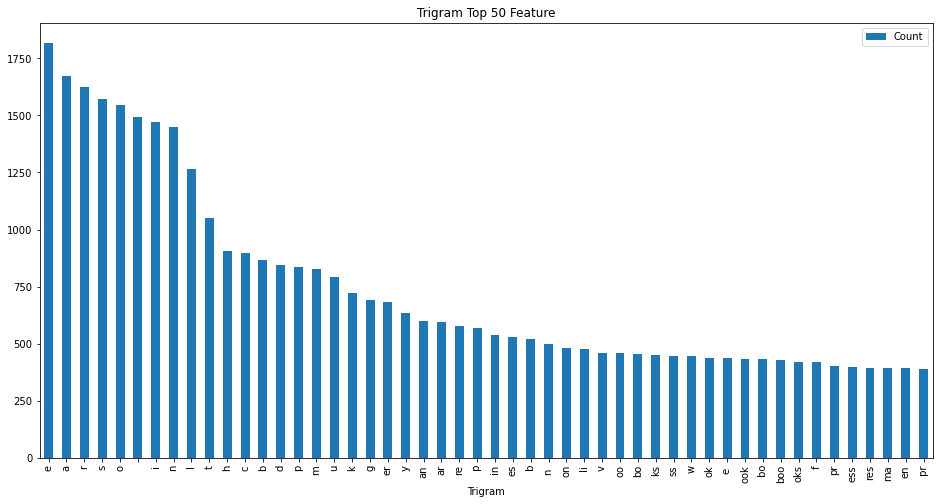

In [53]:
total_words = ap_char_n3gram_vector.sum(axis=0)
frequency = [(word, total_words[0, idx]) for word, idx in tfidf_char_n3gram.vocabulary_.items()]
frequency =sorted(frequency, key = lambda x: x[1], reverse=True)
plot_df = pd.DataFrame(frequency)
plot_df.rename(columns = {0:'Trigram', 1: 'Count'}, inplace = True) 
plot_df = plot_df.head(50)
plot_df.plot(x ='Trigram', y='Count', kind = 'bar', title = "Trigram Top 50 Feature", figsize = (16,8), ); 

del plot_df
del tfidf_char_n3gram
del features
del total_words
del frequency

<center><h3 style="font-size:30px; color:MidnightBlue;">"Use linear_kernel"</h3></center>

In [54]:
lk_AuthorsAndPublisher_n3gram = linear_kernel(ap_char_n3gram_vector, ap_char_n3gram_vector)
print(lk_AuthorsAndPublisher_n3gram[0])

[1.         0.04864307 0.04719255 ... 0.00975363 0.0320731  0.06533905]


<center><h3 style="font-size:30px; color:MidnightBlue;">"Function for Recomandation"</h3></center>

In [55]:
def author_and_publisher_base_recommendations(name, model):
    indexNo = indices[name]
    listOfIndexNo = model[indexNo]
    listOfIndexNo = list(enumerate(listOfIndexNo))    
    listOfIndexNo = sorted(listOfIndexNo, key=lambda x: x[1], reverse=True)
    listOfIndexNo = listOfIndexNo[1:12]   
    listOfIndexNo = [i[0] for i in listOfIndexNo]
    return books_df['Name'].iloc[listOfIndexNo]

In [56]:
author_and_publisher_base_recommendations("Breakfasts & Brunches", lk_AuthorsAndPublisher_n3gram)

18417                Arms and Equipment of the Confederacy
18418                      Arms and Equipment of the Union
2018     Voyages of Discovery, AD 1400 - 1500 (Time Frame)
7333                   Ghosts (The Enchanted World Series)
17315         Magical Justice (The Enchanted World Series)
1536                                The Apparatus of Death
2014            Transformations (Mysteries of the Unknown)
2016                                     The Twisted Dream
2017                                         Lightning War
10119                                         Pasta Sauces
12770                 Hauntings (Mysteries of the Unknown)
Name: Name, dtype: object

<center><h3 style="font-size:30px; color:MidnightBlue;">"Save Trained Model"</h3></center>

In [57]:
# convert numpy array to list
lk_AuthorsAndPublisher_n3gram = list(lk_AuthorsAndPublisher_n3gram)

# reduce the size
for indexNo in range(len(lk_AuthorsAndPublisher_n3gram)):
    listOfIndexNo = lk_AuthorsAndPublisher_n3gram[indexNo]
    listOfIndexNo = list(enumerate(listOfIndexNo))    
    listOfIndexNo = sorted(listOfIndexNo, key=lambda x: x[1], reverse=True)
    listOfIndexNo = listOfIndexNo[1:12]
    lk_AuthorsAndPublisher_n3gram[indexNo] = listOfIndexNo

# save model
with open('savedLinearKernelAuthorsAndPublisher_n3gram.txt', 'wb') as model:
    pickle.dump(lk_AuthorsAndPublisher_n3gram, model)
    
del lk_AuthorsAndPublisher_n3gram

<center><h1 style="font-size:50px; color:green;">Application Phase</h1></center>



<center><h3 style="font-size:30px; color:MidnightBlue;">"Load Save Dataset And Model's"</h3></center>

In [1]:
import pickle
import pandas as pd

# Load Cleaned Data From Our CSV File
books_df = pd.read_csv('books_cleaned_df.csv')
indices = pd.Series(books_df.index, index=books_df['Name']).drop_duplicates()
indices

# Load Description Base Recommandation Model
with open('savedSigmoidKernelDescriptionTrigram.txt', 'rb') as model:
    savedSigmoidKernelDescriptionTrigram_model = pickle.load(model)

# Load Rating and Review Base Recommendation Model
with open('savedSimilarBooksIdListByNN.txt', 'rb') as model:
    savedSimilarBooksIdListByNN_model = pickle.load(model)
    
# Load Authors And Publisher Base Recommendation Model
with open('savedLinearKernelAuthorsAndPublisher_n3gram.txt', 'rb') as model:
    savedLinearKernelAuthorsAndPublisher_n3gram_model = pickle.load(model)


<center><h3 style="font-size:30px; color:MidnightBlue;">"Define All Functions For Application Phase"</h3></center>

In [2]:
# function for Description Base Recommendation
def description_base_recommendations(name, model):
    indexNo = indices[name]
    listOfIndexNo = model[indexNo]
    listOfIndexNo = [i[0] for i in listOfIndexNo]
    return books_df['Name'].iloc[listOfIndexNo]


# function for Rating and Review Base Recommendation
def rating_and_review_base_recommendations(name, similarBooks):
    listOfBooks = []
    IndexNo = books_df[books_df['Name'] == name].index
    IndexNo = IndexNo[0]
    for newid in similarBooks[IndexNo]:
        if books_df.loc[newid].Name != name:
            listOfBooks.append(books_df.loc[newid].Name)
    return listOfBooks


# function for Authors And Publisher Base Recommendation
def author_and_publisher_base_recommendations(name, model):
    indexNo = indices[name]
    listOfIndexNo = model[indexNo]
    listOfIndexNo = [i[0] for i in listOfIndexNo]
    return books_df['Name'].iloc[listOfIndexNo]

<center><h3 style="font-size:30px; color:MidnightBlue;">"Test Loaded Model's"</h3></center>

### 1. Test Description Base Recommandation Model

In [3]:
description_base_recommendations('Breakfasts & Brunches', savedSigmoidKernelDescriptionTrigram_model)

18116     Cooking in a Can: More Campfire Recipes for Kids
3900     The Magic of Fire: Hearth Cooking: One Hundred...
10250    Cooking From the Hip: Fast, Easy, Phenomenal M...
360      How to Cook Everything: Simple Recipes for Gre...
7164                          Market Microstructure Theory
16181                                 Settlement Cook Book
23472    Santa Fe School of Cooking Cookbook: Spirited ...
10956                  The Complete Cooking Light Cookbook
13799                               Gigolos Get Lonely Too
19110    Eula Mae's Cajun Kitchen: Cooking Through the ...
8670                           A French Chef Cooks at Home
Name: Name, dtype: object

### 2. Test Rating and Review Base Recommendation Model

In [4]:
rating_and_review_base_recommendations('Breakfasts & Brunches', savedSimilarBooksIdListByNN_model)

["Mémoires d'Agrippine",
 "Soif d'amour",
 'Life of Themistocles',
 'Singapore: 500 Early Postcards',
 'To Catch a King',
 'A Gathering of Stones',
 'The Camp-Out Mystery',
 "Woman Of Innocence (Morgan's Mercenaries: Women of Destiny No1, Morgan's Mercenaries No19)",
 'Neutron Force (Stony Man, No89)',
 'The Philosophy of Sex: Contemporary  Readings']

### 3. Authors And Publisher Base Recommendation

In [5]:
author_and_publisher_base_recommendations('Breakfasts & Brunches', savedLinearKernelAuthorsAndPublisher_n3gram_model)

18417                Arms and Equipment of the Confederacy
18418                      Arms and Equipment of the Union
2018     Voyages of Discovery, AD 1400 - 1500 (Time Frame)
7333                   Ghosts (The Enchanted World Series)
17315         Magical Justice (The Enchanted World Series)
1536                                The Apparatus of Death
2014            Transformations (Mysteries of the Unknown)
2016                                     The Twisted Dream
2017                                         Lightning War
10119                                         Pasta Sauces
12770                 Hauntings (Mysteries of the Unknown)
Name: Name, dtype: object

<center><h3 style="font-size:30px; color:MidnightBlue;">"Generate API Using Flask"</h3></center>

In [ ]:
# !pip install flask-ngrok

from flask_ngrok import run_with_ngrok
from flask import Flask,jsonify
app =Flask(__name__)
run_with_ngrok(app) #starts ngrok when the app is running
@app.route("/<int:fid>/<title>")
def home(fid, title):
    recommendations_list = []
    if (fid == 1):
        recommendations_list = description_base_recommendations(str(title), savedSigmoidKernelDescriptionTrigram_model)
    if (fid == 2):
        recommendations_list = rating_and_review_base_recommendations(str(title), savedSimilarBooksIdListByNN_model)
    if (fid == 3):
        recommendations_list = author_and_publisher_base_recommendations(str(title), savedLinearKernelAuthorsAndPublisher_n3gram_model)
    ste=''
    for v in recommendations_list:
        ste+=v+' @ '
    return jsonify(ste)
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://6b83e05fa0be.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [14/Jun/2021 02:08:30] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [14/Jun/2021 02:08:46] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [14/Jun/2021 02:08:47] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [14/Jun/2021 02:10:56] "GET /1/A%20French%20Chef%20Cooks%20at%20Home HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2021 02:12:09] "GET /1/Playing%20With%20the%20Enemy:%20A%20Baseball%20Prodigy,%20a%20World%20at%20War,%20and%20a%20Field%20of%20Broken%20Dreams HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2021 02:12:24] "GET /2/Inside%20Havana HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2021 02:12:34] "GET /2/Cooking%20in%20a%20Can:%20More%20Campfire%20Recipes%20for%20Kids HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2021 02:12:48] "GET /2/Cooking%20in%20a%20Can:%20More%20Campfire%20Recipes%20for%20Kids HTTP/1.1" 200 -
